In [1]:
using Pkg
Pkg.activate(".")

  Activating project at `~/code/phasor_julia`


In [2]:
include("src/spiking.jl")
include("src/vsa.jl")

similarity_outer (generic function with 2 methods)

In [3]:
using Plots

In [4]:
n_x = 101
n_y = 101
n_vsa = 1

1

In [5]:
repeats = 6

6

In [6]:
phases = collect([[x, y] for x in range(-1.0, 1.0, n_x), y in range(-1.0, 1.0, n_y)]) |> stack
phases = reshape(phases, (1,2,:))

1×2×10201 Array{Float64, 3}:
[:, :, 1] =
 -1.0  -1.0

[:, :, 2] =
 -0.98  -1.0

[:, :, 3] =
 -0.96  -1.0

;;; … 

[:, :, 10199] =
 0.96  1.0

[:, :, 10200] =
 0.98  1.0

[:, :, 10201] =
 1.0  1.0

In [7]:
b = bind(phases, dims=2)

1×1×10201 Array{Float64, 3}:
[:, :, 1] =
 0.0

[:, :, 2] =
 0.020000000000000018

[:, :, 3] =
 0.040000000000000036

;;; … 

[:, :, 10199] =
 -0.040000000000000036

[:, :, 10200] =
 -0.020000000000000018

[:, :, 10201] =
 0.0

In [8]:
spk_args = SpikingArgs(t_window=0.01)

Neuron parameters: Period 1.0 (s)
Current kernel duration: 0.01 (s)
Threshold: 0.02 (V)


In [9]:
tspan = (0.0, repeats*1.0)

(0.0, 6.0)

In [10]:
tbase = collect(tspan[1]:spk_args.dt:tspan[2]);

In [11]:
st_x = phase_to_train(phases[1:1,1:1,:], spk_args, repeats = repeats)
st_y = phase_to_train(phases[1:1,2:2,:], spk_args, repeats = repeats)

Spike Train: (1, 1, 10201) with 61206 spikes.

In [12]:
st_x.shape

(1, 1, 10201)

In [13]:
st_x

Spike Train: (1, 1, 10201) with 61206 spikes.

In [14]:
uout = bind(st_x, st_y, tspan=tspan, return_solution=true);

In [15]:
uout |> size

(1, 1, 10201, 601)

In [16]:
plot(uout[1,1,501,:])

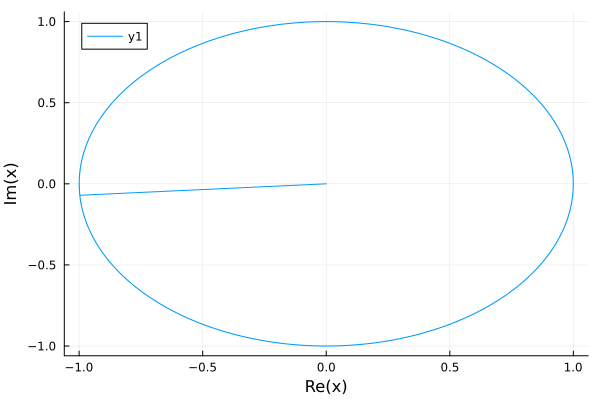

In [17]:
plot(uout[1,1,101,:])

In [18]:
decoded = potential_to_phase(uout, tbase, dim=4, spk_args=spk_args) 

1×1×10201×601 Array{Float64, 4}:
[:, :, 1, 1] =
 -1.0

[:, :, 2, 1] =
 -1.0

[:, :, 3, 1] =
 -1.0

;;; … 

[:, :, 10199, 1] =
 -1.0

[:, :, 10200, 1] =
 -1.0

[:, :, 10201, 1] =
 -1.0

[:, :, 1, 2] =
 -2.7332060169693584e-5

[:, :, 2, 2] =
 0.019986333969915115

[:, :, 3, 2] =
 -0.9800000000000001

;;; … 

[:, :, 10199, 2] =
 -0.9800000000000001

[:, :, 10200, 2] =
 -0.9800000000000001

[:, :, 10201, 2] =
 -0.9800000000000001

[:, :, 1, 3] =
 -5.3700909575460365e-5

[:, :, 2, 3] =
 0.019959724939676793

[:, :, 3, 3] =
 0.03997314954521225

;;; … 

[:, :, 10199, 3] =
 -0.9600000000000001

[:, :, 10200, 3] =
 -0.9600000000000001

[:, :, 10201, 3] =
 -0.9600000000000001

;;;; … 

[:, :, 1, 599] =
 -0.03766360088588139

[:, :, 2, 599] =
 -0.01737595971753969

[:, :, 3, 599] =
 0.004104955842974878

;;; … 

[:, :, 10199, 599] =
 -0.07143327209811634

[:, :, 10200, 599] =
 -0.04393314971522022

[:, :, 10201, 599] =
 -0.038242779901573876

[:, :, 1, 600] =
 -0.037689967663198765

[:, :, 2, 60

In [19]:
decoded |> size

(1, 1, 10201, 601)

In [20]:
b[1,:,:] |> size

(1, 10201)

In [21]:
err = (decoded[1,:,:,:] .- b[1,:,:]);

In [22]:
err |> size

(1, 10201, 601)

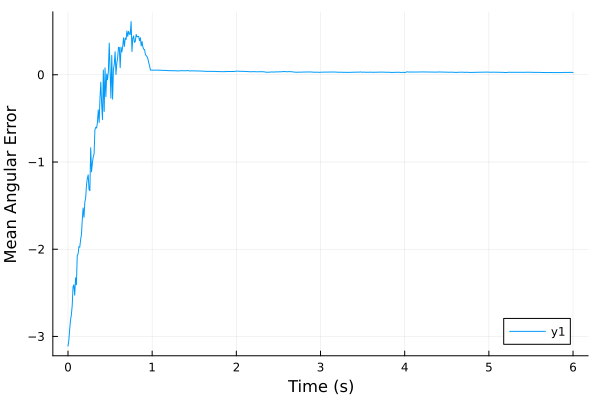

In [35]:
fig = plot(tbase, pi .* (mean(err, dims=2)) |> vec)
ylabel!("Mean Angular Error")
xlabel!("Time (s)")

In [36]:
png(fig, "bind time error.png")

"bind time error.png"

In [25]:
b2 = bind(st_x, st_y, tspan=tspan, return_solution=false);

In [27]:
b2d = train_to_phase(b2, spk_args);

6×1×1×10201 Array{Float64, 4}:
[:, :, 1, 1] =
 -0.020000000000000018
 -0.06000000000000005
 -0.05999999999999961
 -0.05999999999999961
 -0.0600000000000005
 -0.03999999999999915

[:, :, 1, 2] =
  0.0
 -0.040000000000000036
 -0.040000000000000036
 -0.040000000000000036
 -0.019999999999999574
 -0.019999999999999574

[:, :, 1, 3] =
  0.040000000000000036
  0.0
 -0.019999999999999574
 -0.019999999999999574
  0.0
  0.0

;;;; … 

[:, :, 1, 10199] =
 NaN
  -0.1200000000000001
  -0.1200000000000001
  -0.09999999999999964
  -0.09999999999999964
  -0.08000000000000007

[:, :, 1, 10200] =
 NaN
  -0.10000000000000009
  -0.09999999999999964
  -0.08000000000000007
  -0.0600000000000005
  -0.0600000000000005

[:, :, 1, 10201] =
 NaN
  -0.08000000000000007
  -0.08000000000000007
  -0.05999999999999961
  -0.0600000000000005
  -0.03999999999999915

In [39]:
fig = scatter(pi  |> vec, pi .*  |> vec)
xlabel!("Encoded Phase")
ylabel!("Decoded Phase")

In [40]:
png(fig, "bind phase error.png")

"bind phase error.png"

In [47]:
enc_error = filter(x -> !isnan(x), vec(b2d[5,:,:,:]) .- vec(b));

In [48]:
using StatsPlots: density

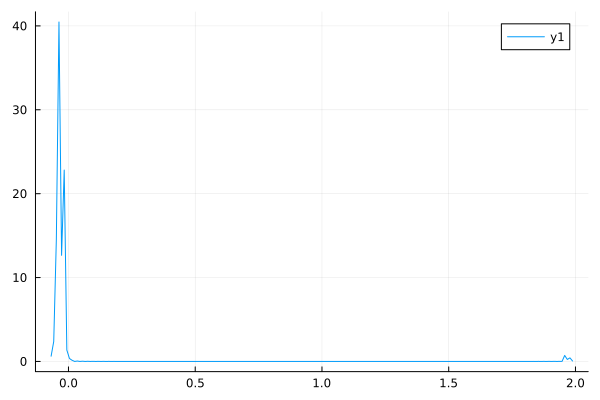

In [51]:
density(enc_error)

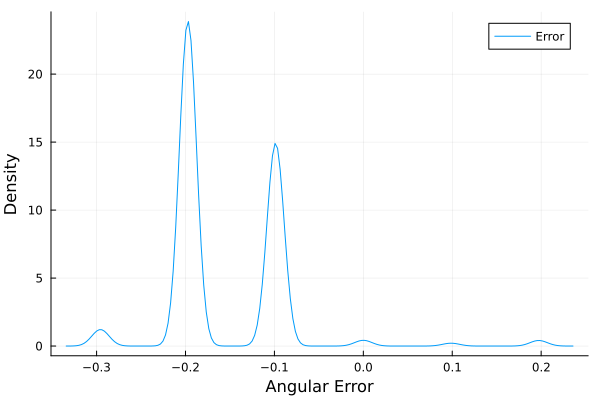

In [49]:
fig = density(pi .* sin.(0.5 .* pi .* enc_error), label="Error")
xlabel!("Angular Error")
ylabel!("Density")